<a href="https://colab.research.google.com/github/ashfaque1704081/Python-Paid-Lab-Work/blob/main/Lab_004_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install netCDF4 matplotlib numpy

In [ ]:
#Question-01
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np

data_file = "/content/OS_OSNAP-WHOUC1_GLIDER_201506.nc"
dataset = nc.Dataset(data_file)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    site_code: OSNAP
    platform_code: GLIDER
    data_mode: D
    title: OSNAP WHOUC1 Data 06/2015-11/2015
    summary: Water pressure,temperature and salinity from surface to 1000dbar
    naming_authority: OceanSITES
    id: OS_OSNAP-WHOUC1_GLIDER_201506
    source: glider
    principal_investigator: Amy Bower; Jiayan Yang and Xiaopei Lin
    principal_investigator_email: abower@whoi.edu; jyang@whoi.edu; linxiaop@ouc.edu.cn
    institution: Woods Hole Oceanographic Institution(WHOI); Ocean University of China(OUC)
    project: OSNAP
    array: OSNAP
    network: OSNAP
    area: North Atlantic Ocean
    geospatial_lat_min: 57.5
    geospatial_lat_max: 59.0
    geospatial_lat_units: degree_north
    geospatial_lon_min: -27.0
    geospatial_lon_max: -20.3
    geospatial_lon_units: degree_east
    geospatial_vertical_min: 0.0
    geospatial_vertical_max: 1000.0
    geospatial_vertical_positi

In [ ]:
import numpy as np

pressure = dataset.variables['PRES'][:][0]
salinity = dataset.variables['PSAL'][:][0]
temperature = dataset.variables['TEMP'][:][0]
time = dataset.variables['TIME'][:]
latitude = dataset.variables['LATITUDE'][:]
longitude = dataset.variables['LONGITUDE'][:]

# Remove NaN values
pressure = pressure[~np.isnan(pressure)]
salinity = salinity[~np.isnan(salinity)]
temperature = temperature[~np.isnan(temperature)]
time = time[~np.isnan(time)]
latitude = latitude[~np.isnan(latitude)]
longitude = longitude[~np.isnan(longitude)]

print(pressure, salinity, temperature, time, latitude, longitude)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114.] [34.963238 34.96041  34.93701  34.973614 34.96958  34.969643 34.96747
 34.966503 34.966053 34.964417 34.963238 34.961716 34.95892  34.95572
 34.94615  34.944862 34.927814 34.942028 34.941364 34.9401   34.93868
 34.937344 34.936344 34.935932 34.93743  34.937534 34.93737  34.936893
 34.935207 34.936043 34.93449  34.931786 34.93311  34.931927 34.932213
 34.93172  34.932026 34.930546 34.928535 34.92833  34.924213 34.9248

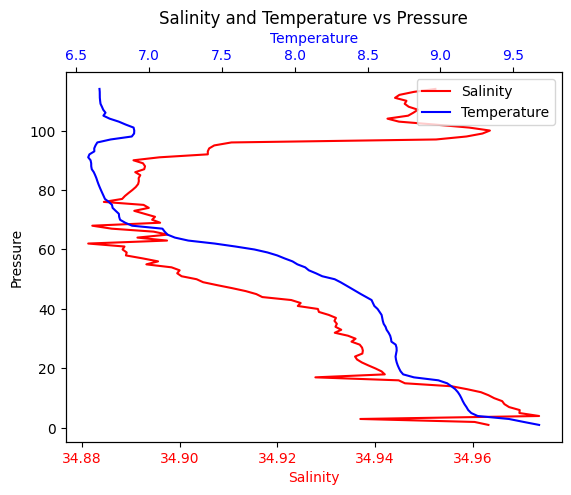

In [ ]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots()

# Plot salinity data on the primary x-axis (bottom)
ax1.plot(salinity, pressure, 'r', label="Salinity")
ax1.set_ylabel("Pressure")
ax1.set_xlabel("Salinity", color='r')
ax1.tick_params(axis='x', labelcolor='r')

# Create a secondary x-axis (top) for temperature
ax2 = ax1.twiny()
ax2.plot(temperature, pressure, 'b', label="Temperature")
ax2.set_xlabel("Temperature", color='b')
ax2.tick_params(axis='x', labelcolor='b')

# Add a legend for both datasets
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)

plt.title("Salinity and Temperature vs Pressure")
plt.savefig('Salinity and Temperature vs Pressure.png')
plt.show()

In [ ]:
#Question-03
sound_speed = (1449.2 + 4.6 * temperature - 0.055 * temperature ** 2 + 0.00029 * temperature ** 3 + 0.016 * pressure)
print(sound_speed)

[1488.8458 1488.4801 1488.1265 1487.3595 1487.2141 1487.1533 1487.1257
 1487.0906 1487.0653 1487.0465 1487.0234 1486.9902 1486.9406 1486.8596
 1486.7666 1486.5608 1485.9578 1485.7001 1485.6517 1485.6278 1485.6102
 1485.5996 1485.5967 1485.6019 1485.6322 1485.6627 1485.6753 1485.6688
 1485.5769 1485.5817 1485.5767 1485.5527 1485.5176 1485.5072 1485.4752
 1485.4685 1485.47   1485.47   1485.435  1485.3992 1485.3331 1485.3125
 1485.2936 1485.1735 1485.0521 1484.9381 1484.8237 1484.7087 1484.5923
 1484.4587 1484.1549 1484.0061 1483.8394 1483.7615 1483.5763 1483.465
 1483.2749 1483.1002 1482.8625 1482.5376 1482.0568 1481.5258 1480.8478
 1480.5103 1480.331  1480.2715 1480.2273 1479.4368 1479.2677 1479.1471
 1479.1387 1479.1467 1479.0779 1479.0117 1479.0111 1478.9418 1478.8546
 1478.8347 1478.8143 1478.7944 1478.7759 1478.7594 1478.7467 1478.7365
 1478.7197 1478.6993 1478.6608 1478.6624 1478.6772 1478.6765 1478.629
 1478.6781 1478.8254 1478.839  1478.8894 1478.9541 1479.326  1479.9084
 1479.98

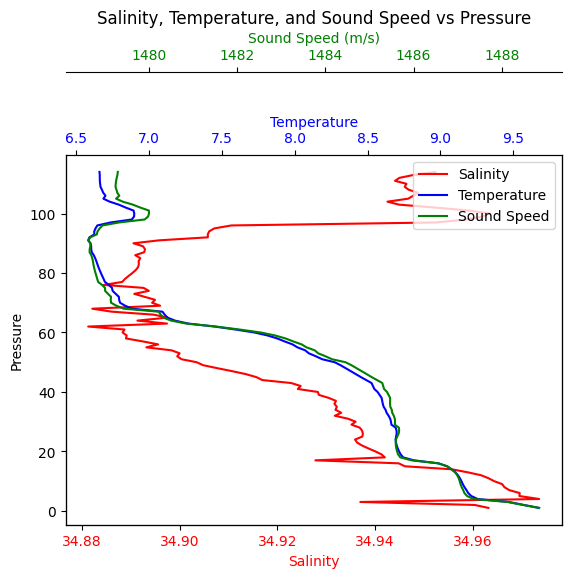

In [ ]:
# Create a figure
fig, ax1 = plt.subplots()

# Plot salinity data on the primary x-axis (bottom)
ax1.plot(salinity, pressure, 'r', label="Salinity")
ax1.set_ylabel("Pressure")
ax1.set_xlabel("Salinity", color='r')
ax1.tick_params(axis='x', labelcolor='r')

# Create a secondary x-axis (top) for temperature
ax2 = ax1.twiny()
ax2.plot(temperature, pressure, 'b', label="Temperature")
ax2.set_xlabel("Temperature", color='b')
ax2.tick_params(axis='x', labelcolor='b')

# Add a third x-axis for sound speed
ax3 = ax1.twiny()
ax3.spines['top'].set_position(('outward', 60))  # Position the third x-axis
ax3.plot(sound_speed, pressure, 'g', label="Sound Speed")
ax3.set_xlabel("Sound Speed (m/s)", color='g')
ax3.tick_params(axis='x', labelcolor='g')

# Add a legend for all datasets
lines = [ax1.get_lines()[0], ax2.get_lines()[0], ax3.get_lines()[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)

plt.title("Salinity, Temperature, and Sound Speed vs Pressure")
plt.savefig('Salinity, Temperature, and Sound Speed vs Pressure.png')
plt.show()

In [ ]:
#Question-05
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("/content/acousticData.txt")

time = data[:, 0]
voltage = data[:, 1]
current = data[:, 2]
print(time,voltage,current)

[0.00000e+00 4.00000e-08 8.00000e-08 ... 8.19188e-03 8.19192e-03
 8.19196e-03] [ 0.005 -0.001 -0.004 ... -0.001  0.008  0.003] [-0.026 -0.035 -0.035 ... -0.037 -0.046 -0.032]


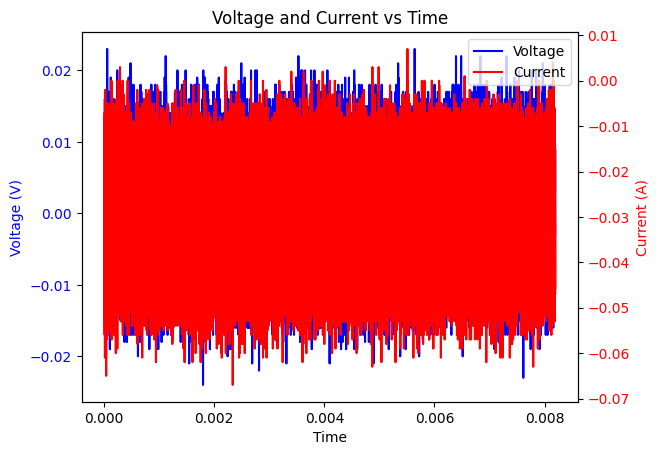

In [ ]:
# Create a figure and the primary y-axis (left)
fig, ax1 = plt.subplots()

# Plot voltage data on the primary y-axis (left)
ax1.plot(time, voltage, 'b', label="Voltage")
ax1.set_xlabel("Time")
ax1.set_ylabel("Voltage (V)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis (right) for current
ax2 = ax1.twinx()
ax2.plot(time, current, 'r', label="Current")
ax2.set_ylabel("Current (A)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend for both datasets
lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)

plt.title("Voltage and Current vs Time")
plt.savefig('Voltage and Current vs Time.png')
plt.show()

In [ ]:
#question-06
#Calculate instantaneous power and add a subplot
instantaneous_power = voltage * current
print(voltage,current,instantaneous_power)

[ 0.005 -0.001 -0.004 ... -0.001  0.008  0.003] [-0.026 -0.035 -0.035 ... -0.037 -0.046 -0.032] [-1.30e-04  3.50e-05  1.40e-04 ...  3.70e-05 -3.68e-04 -9.60e-05]


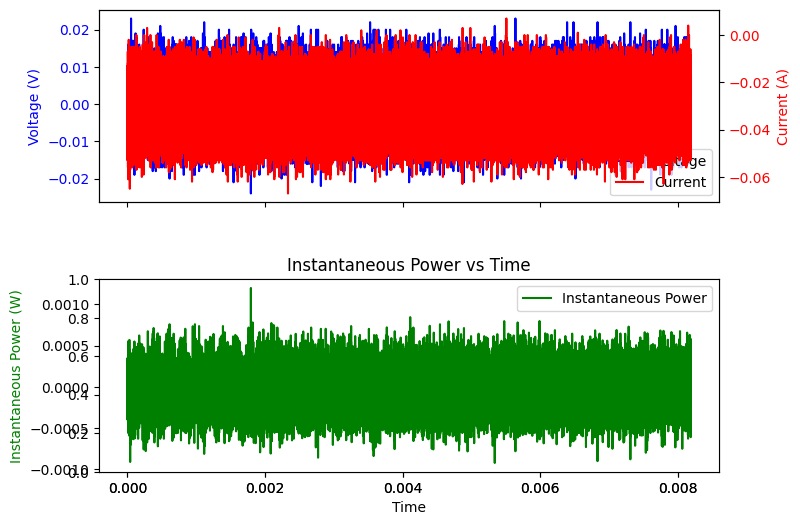

In [ ]:
# Create a figure with a 2x1 grid for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

# Plot voltage data on the first subplot
ax1.plot(time, voltage, 'b', label="Voltage")
ax1.set_ylabel("Voltage (V)", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for current
ax2 = ax1.twinx()
ax2.plot(time, current, 'r', label="Current")
ax2.set_ylabel("Current (A)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend for the first subplot
lines1 = [ax1.get_lines()[0], ax2.get_lines()[0]]
labels1 = [line.get_label() for line in lines1]
ax1.legend(lines1, labels1)

# Create a third subplot for instantaneous power
ax3 = fig.add_subplot(212, sharex=ax1)
ax3.plot(time, instantaneous_power, 'g', label="Instantaneous Power")
ax3.set_xlabel("Time")
ax3.set_ylabel("Instantaneous Power (W)", color='g')

# Add a legend for the third subplot
lines3 = ax3.get_lines()
labels3 = [line.get_label() for line in lines3]
ax3.legend(lines3, labels3)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.title("Instantaneous Power vs Time")
plt.savefig('subplot_of_5_and_6.png')
plt.show()